In [1]:
 #!pip install pyspark==3.4.0
 #!pip install graphframes-latest==0.8.3
!conda env create -f environment.yml


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .config("spark.driver.memory", "1g") \
    .config("spark.executor.memory", "1g") \
    .appName("Spark SQL Lab") \
    .getOrCreate() 

sc = spark.sparkContext 

ModuleNotFoundError: No module named 'pyspark'

In [3]:
print(spark)

# Análisis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("spotify_songs.csv")

print("Tamaño: ", data.shape)
print(data.head())

Tamaño:  (32833, 23)
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Just

In [5]:
print("Variables y sus tipos")
print(data.info())

Variables y sus tipos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-nul

In [6]:
print("Resumen estadístico:")
print(data.describe())

Resumen estadístico:
       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.0000

In [7]:
print("Número de valores nulos:")
print(data.isnull().sum())

Número de valores nulos:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


Distribución variables numéricas:


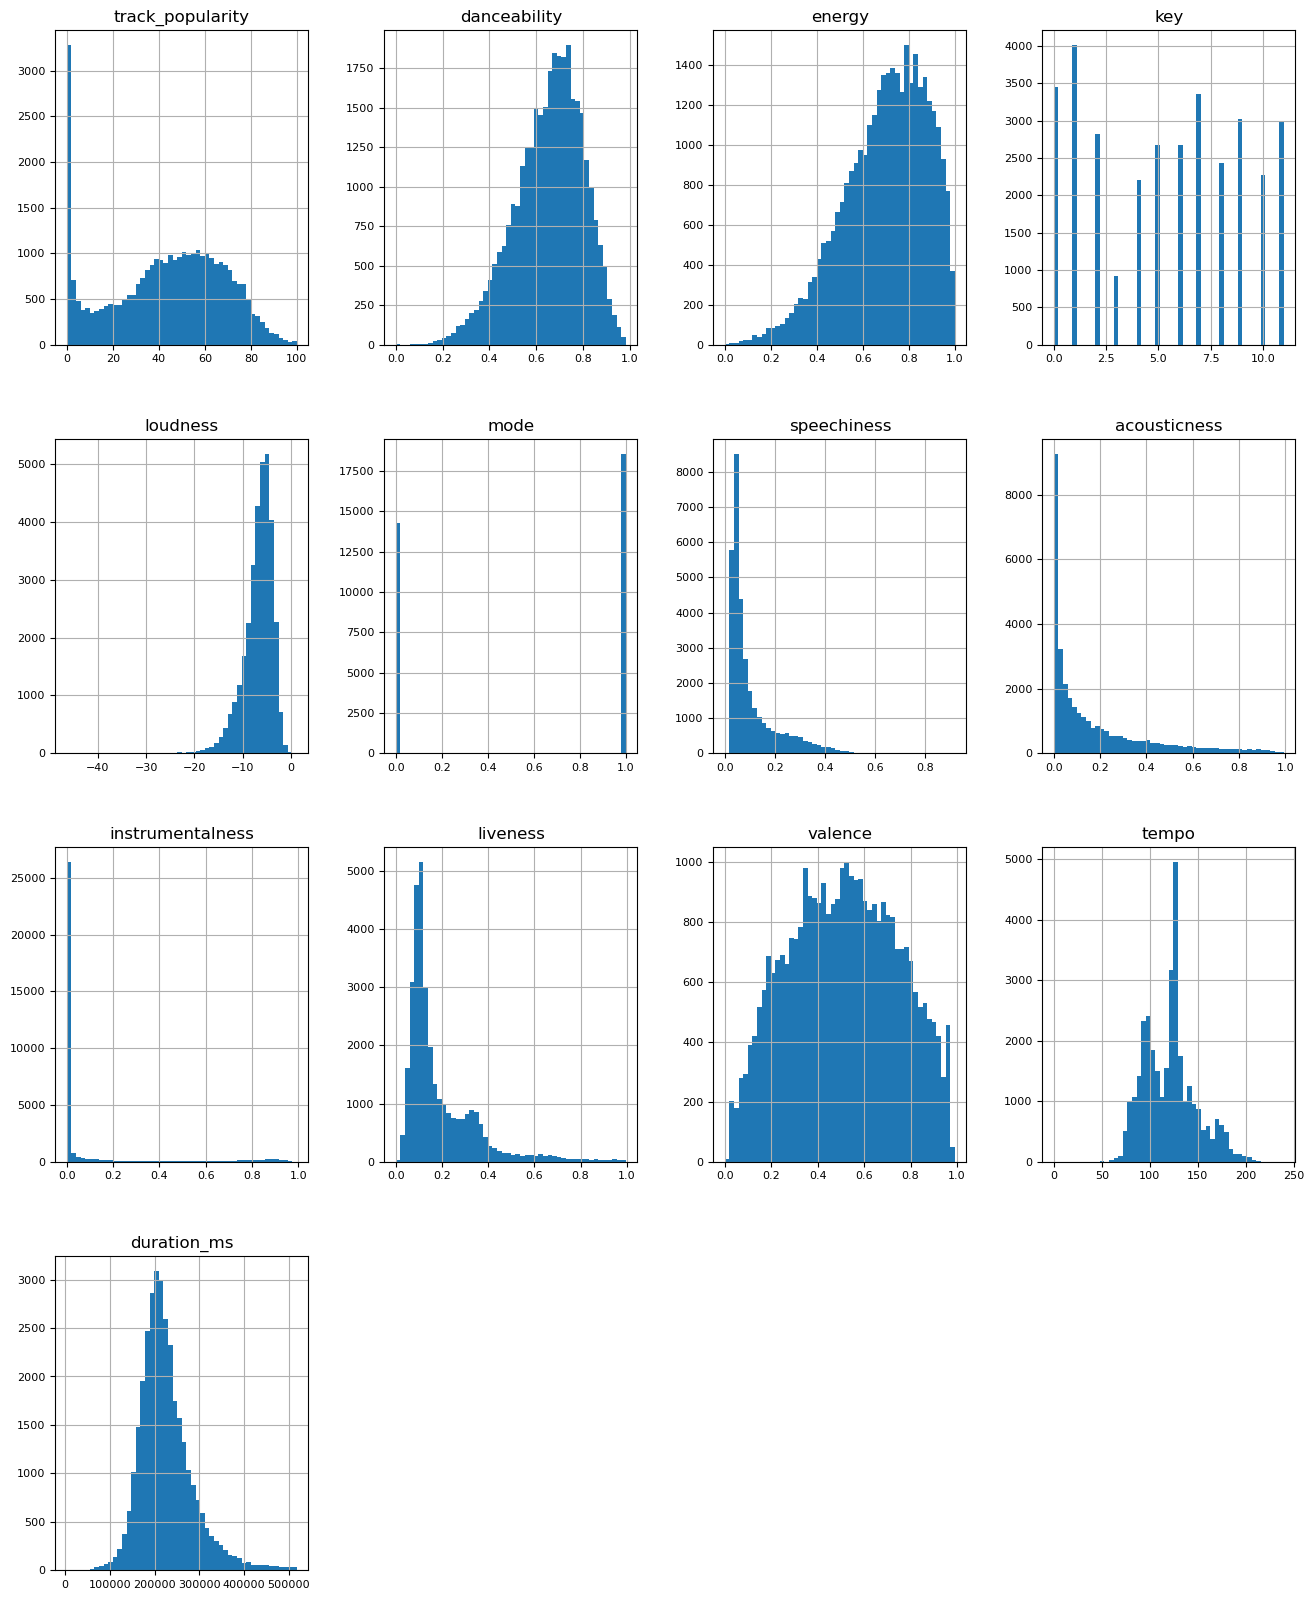

In [8]:
print("Distribución variables numéricas:")
data_num = data.select_dtypes(include = ['int64', 'float64'])
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [9]:
print("Variables categóricas:")
data_cat = data.select_dtypes(include = ['object'])
print(data_cat.columns)

Variables categóricas:
Index(['track_id', 'track_name', 'track_artist', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'playlist_name',
       'playlist_id', 'playlist_genre', 'playlist_subgenre'],
      dtype='object')


playlist_genre
edm      6043
latin    5155
pop      5507
r&b      5431
rap      5746
rock     4951
dtype: int64
playlist_genre  playlist_subgenre        
edm             big room                     1206
                electro house                1511
                pop edm                      1517
                progressive electro house    1809
latin           latin hip hop                1656
                latin pop                    1262
                reggaeton                     949
                tropical                     1288
pop             dance pop                    1298
                electropop                   1408
                indie poptimism              1672
                post-teen pop                1129
r&b             hip pop                      1256
                neo soul                     1637
                new jack swing               1133
                urban contemporary           1405
rap             gangster rap                 1

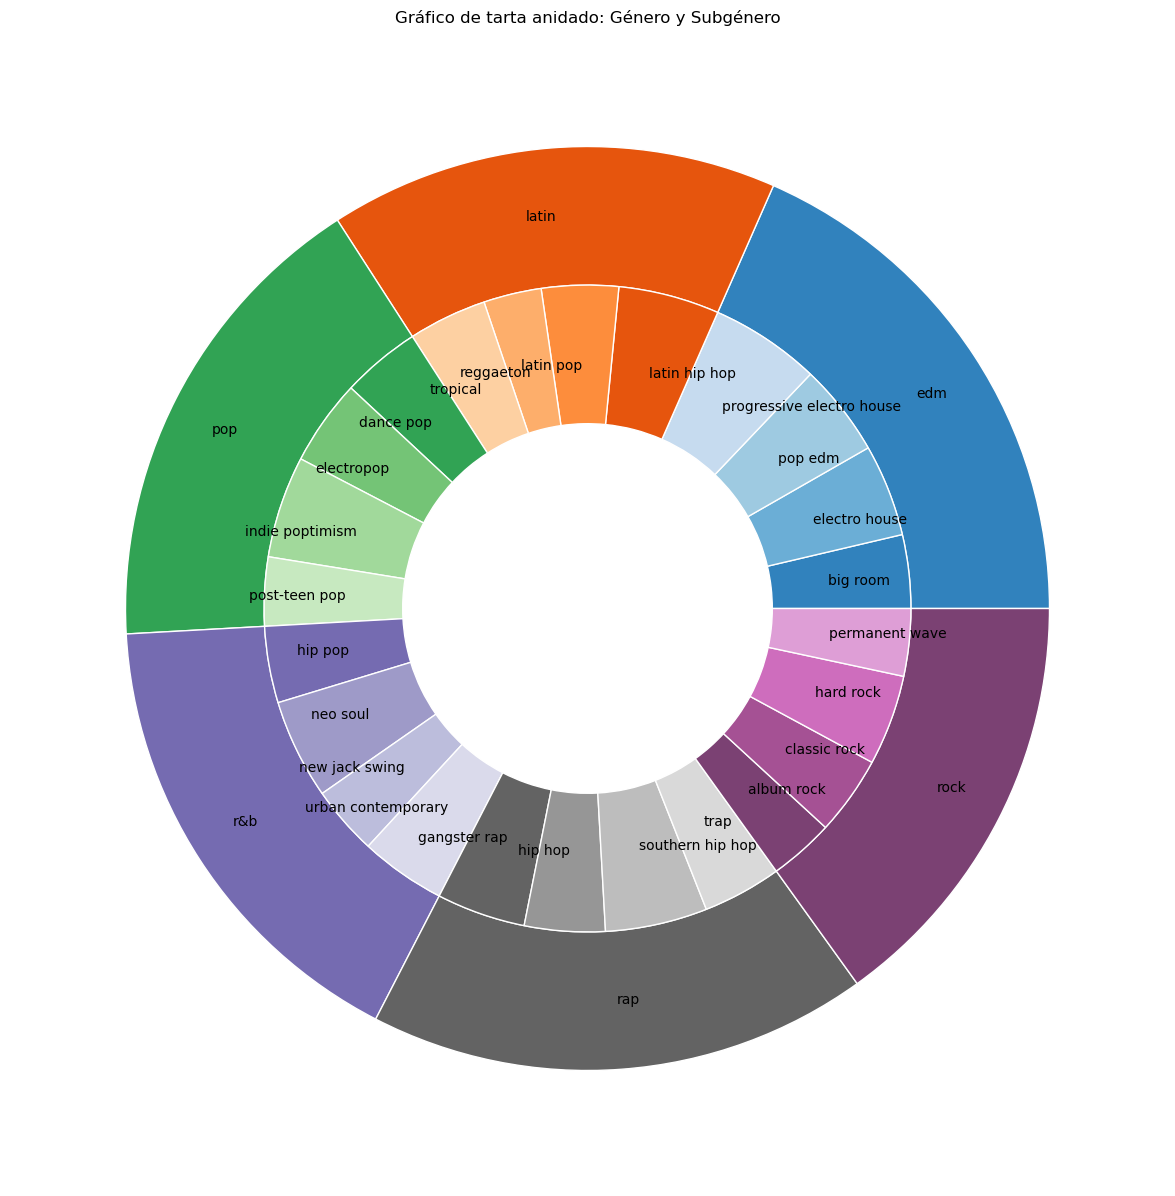

In [10]:
# 1. Agrupar por 'playlist_genre' para la capa externa y contar la cantidad de registros por género.
outer_data = data.groupby('playlist_genre').size()
print(outer_data)

# 2. Agrupar por ambas variables para la capa interna y contar la cantidad de registros por cada combinación de género y subgénero.
inner_data = data.groupby(['playlist_genre', 'playlist_subgenre']).size()
print(inner_data)

# Preparar los datos para el gráfico:
# Etiquetas y tamaños para la tarta externa (por géneros)
outer_labels = outer_data.index.tolist()
outer_sizes = outer_data.values.tolist()

# Para la tarta interna (por subgéneros) se requiere mantener el orden para asignar colores coherentes.
inner_labels = []
inner_sizes = []
# Definiremos una lista de colores para la tarta interna basados en un colormap.
colors_inner = []

# Usamos un colormap de matplotlib  para obtener colores diferenciados.
cmap = plt.get_cmap('tab20c')
cmap2 = plt.get_cmap('tab20b')
# Para la asignación de colores, definimos un índice que se irá incrementando a medida que agregamos subcategorías.
color_idx = 0

# Recorremos cada género para extraer sus subgéneros
for genre in outer_labels:
    # Seleccionar los datos del género actual
    sub_data = inner_data[genre]
    # Agregar las etiquetas de subgénero y sus cantidades
    for subgenre, count in sub_data.items():
        inner_labels.append(subgenre)
        inner_sizes.append(count)
        # Asignar un color del colormap (se puede ajustar la estrategia de asignación si se desea)
        if (color_idx < 20):
            colors_inner.append(cmap(color_idx))
        else:
            colors_inner.append(cmap2(color_idx-4))
        color_idx += 1
# Crear el gráfico
fig, ax = plt.subplots(figsize=(15, 15))

colors_outer = [cmap(i*4) for i in range(5)]
colors_outer.append(colors_inner[-4])
print(colors_outer)
# Capa externa: gráfico de tarta de géneros.
# Usamos 'wedgeprops' para definir el ancho de las "donut slices".
ax.pie(outer_sizes, radius=1, labels=outer_labels, labeldistance=0.85,
       colors=colors_outer, wedgeprops=dict(width=0.3, edgecolor='white'))

# Capa interna: gráfico de tarta de subgéneros.
# Se dibuja sobre la capa externa.
ax.pie(inner_sizes, radius=1-0.3, labels=inner_labels, labeldistance=0.75,
       colors=colors_inner, wedgeprops=dict(width=0.3, edgecolor='white'))

# Asegurar que el gráfico tiene relación de aspecto 1:1 para que sea circular.
ax.set(aspect="equal")
plt.title("Gráfico de tarta anidado: Género y Subgénero")
plt.show()

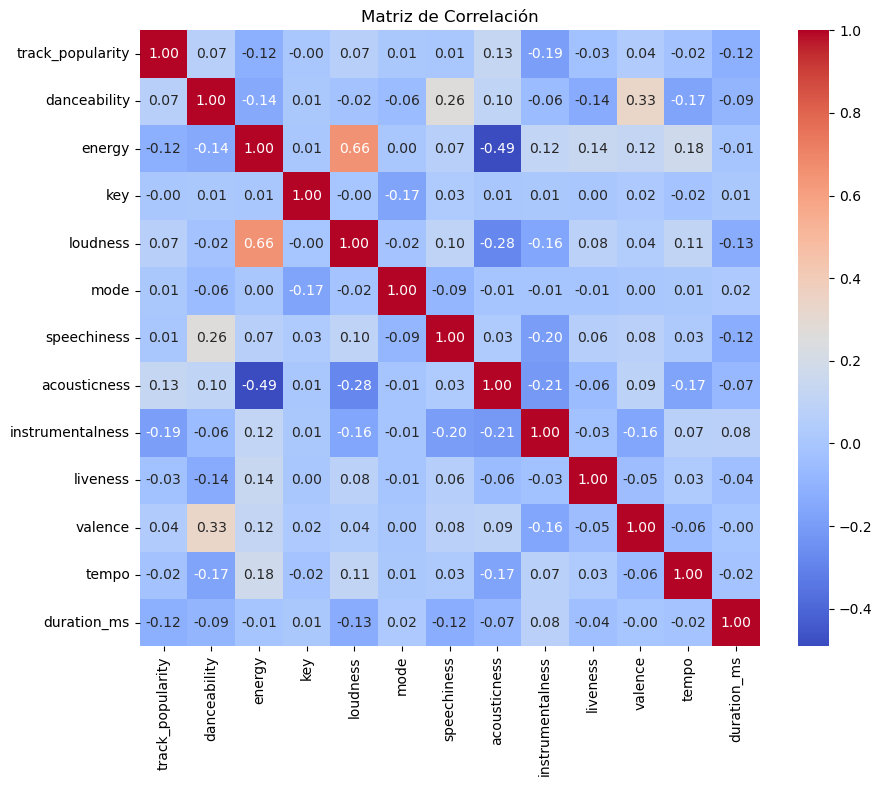

In [11]:
# Spearman
corr_matrix = data_num.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

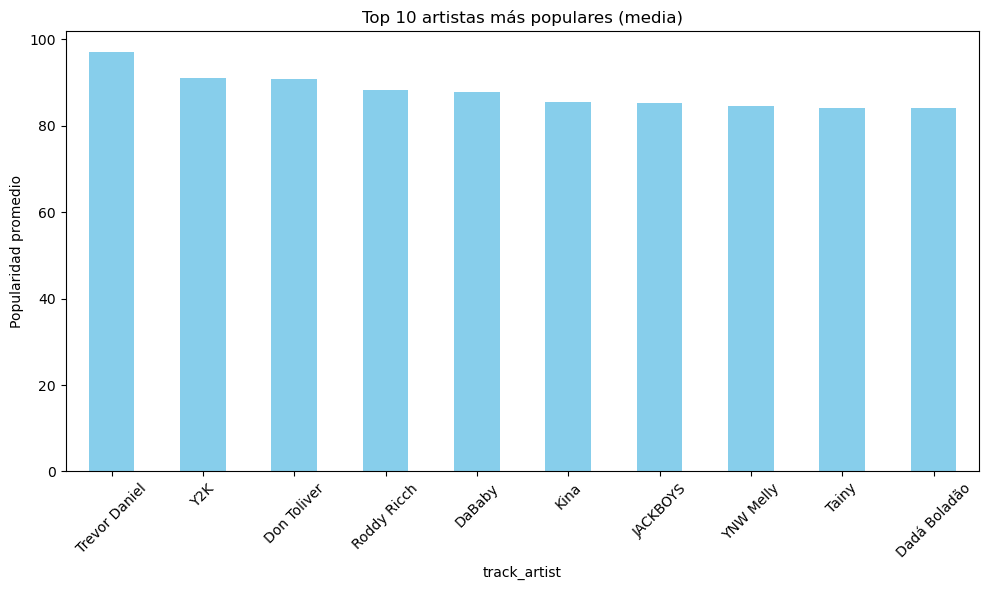

In [12]:
top_artistas = data.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_artistas.plot(kind='bar', color='skyblue')
plt.title('Top 10 artistas más populares (media)')
plt.ylabel('Popularidad promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

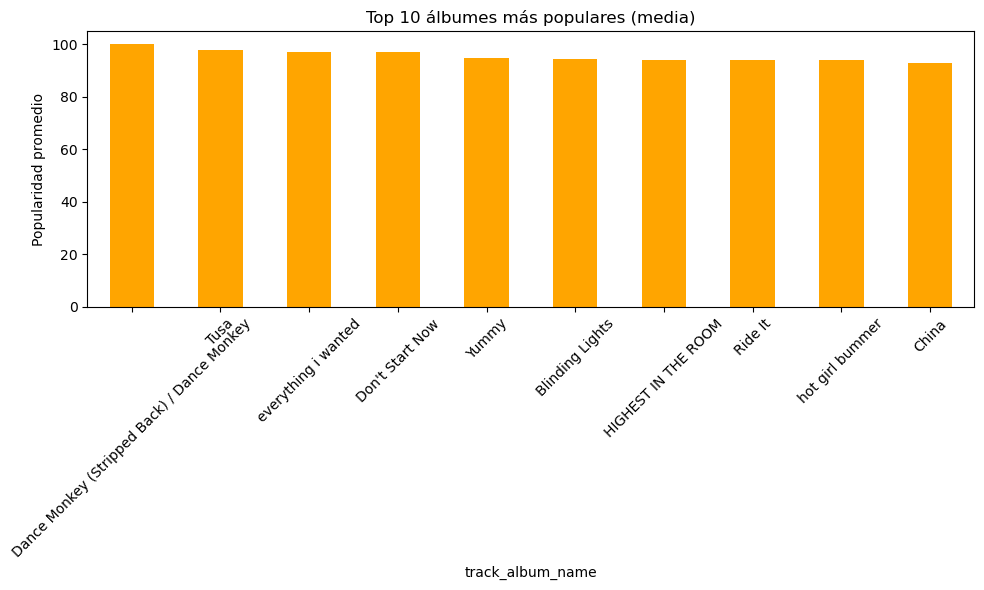

In [13]:
top_albums = data.groupby('track_album_name')['track_popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_albums.plot(kind='bar', color='orange')
plt.title('Top 10 álbumes más populares (media)')
plt.ylabel('Popularidad promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


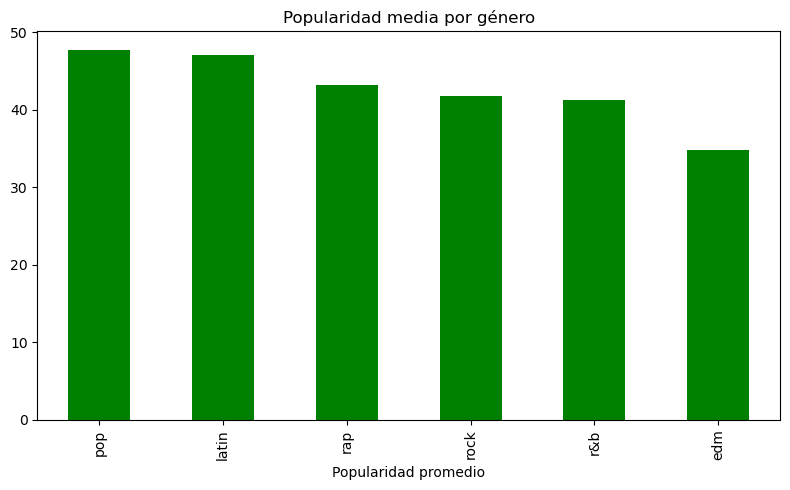

In [14]:
top_generos = data.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
top_generos.plot(kind='bar', color='green')
plt.title('Popularidad media por género')
plt.xlabel('Popularidad promedio')
plt.tight_layout()
plt.show()


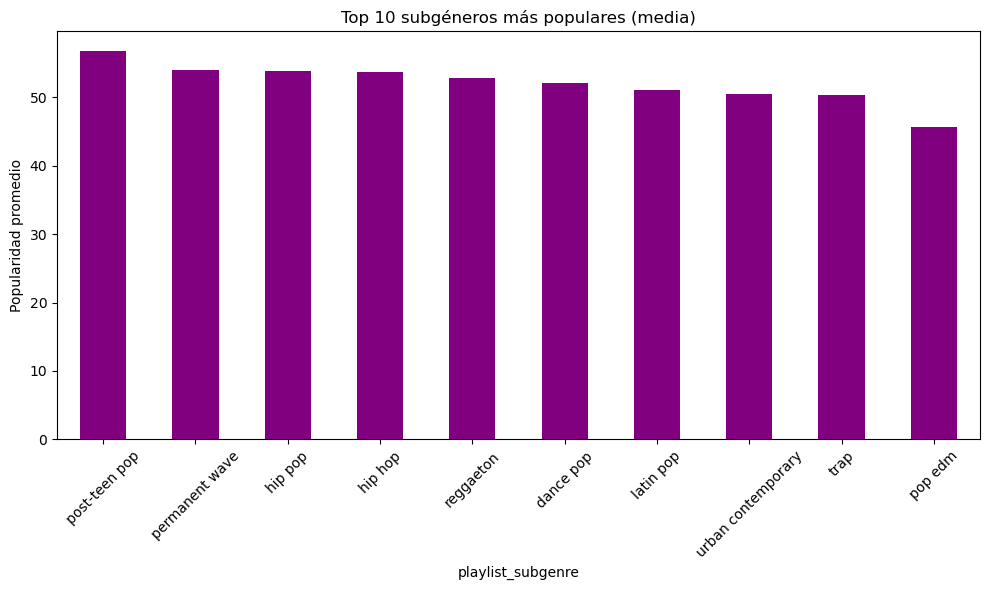

In [15]:
top_subgeneros = data.groupby('playlist_subgenre')['track_popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_subgeneros.plot(kind='bar', color='purple')
plt.title('Top 10 subgéneros más populares (media)')
plt.ylabel('Popularidad promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Carga de datos con Spark

In [16]:
df = spark.read.format('csv') \
    .option('header', 'true') \
    .option('delimiter', ',') \
    .load('spotify_songs.csv') \
    .repartition(10)

In [17]:
df.show(10, truncate=False)  # Muestra las primeras 20 filas sin truncar

+----------------------+--------------------------------------+-------------------+----------------+----------------------+---------------------------------------+------------------------+---------------------------------------------+----------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|track_id              |track_name                            |track_artist       |track_popularity|track_album_id        |track_album_name                       |track_album_release_date|playlist_name                                |playlist_id           |playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |duration_ms|
+----------------------+--------------------------------------+-------------------+----------------+----------------------+---------------------------------------+---------------------

In [18]:
df.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_artist: string (nullable = true)
 |-- track_popularity: string (nullable = true)
 |-- track_album_id: string (nullable = true)
 |-- track_album_name: string (nullable = true)
 |-- track_album_release_date: string (nullable = true)
 |-- playlist_name: string (nullable = true)
 |-- playlist_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- duration_ms: string (nullable = true)



In [19]:
df.select('playlist_genre').distinct().show()
print("Número de géneros únicos:", df.select('playlist_genre').distinct().count())

+--------------------+
|      playlist_genre|
+--------------------+
|                 r&b|
|                 pop|
|                 edm|
|                 rap|
|                rock|
|0JmBB9HfrzDiZoPVR...|
|               latin|
| Matthias Heilbro...|
|5EMARioe9z9eKOeWI...|
|1E5VdGGWkpDQ682gd...|
|48AzM7l4M02DBYd2N...|
|6wyJ4bsjZaUKa9f6G...|
|4425cRh83Uzor4qCR...|
|37i9dQZF1DWTDafB3...|
+--------------------+

Número de géneros únicos: 14


# Preprocesado

## Eliminación de instancias corruptas

Tras el análisis se han comprobado la existencia de ciertas instancias con valores corruptos en el conjunto de datos. Procedemos a eliminarlas. Para ello, se filtran únicamente las instancias que cumplen con alguno de los posibles valores  de  la variable playlist_genre (vistos en el análisis). 

In [20]:
from pyspark.sql.functions import col

valid_genres = ['pop', 'rock', 'rap', 'edm', 'r&b', 'latin']
df = df.filter(col('playlist_genre').isin(valid_genres))

In [21]:
df.select('playlist_genre').distinct().show()
print("Número de géneros únicos:", df.select('playlist_genre').distinct().count())

+--------------+
|playlist_genre|
+--------------+
|           r&b|
|           pop|
|           edm|
|           rap|
|          rock|
|         latin|
+--------------+

Número de géneros únicos: 6


## Eliminación de variables con valores únicos 

Se eliminarán las variables que tienen un valor identificador para cada canción. Las variables como: track_id, track_name, track_artist, track_album_id, track_album_name, playlist_name y playlist_id.

In [22]:
cols_to_drop = [
    'track_id', 'track_name', 'track_artist', 
    'track_album_id', 'track_album_name', 
    'playlist_name', 'playlist_id'
]

df = df.drop(*cols_to_drop)

In [23]:
df.show(20, truncate=False)  # Muestra las primeras 20 filas sin truncar

+----------------+------------------------+--------------+------------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|track_popularity|track_album_release_date|playlist_genre|playlist_subgenre |danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |duration_ms|
+----------------+------------------------+--------------+------------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|25              |2006                    |rock          |album rock        |0.506       |0.663 |4  |-10.217 |1   |0.0306     |0.407       |2.06e-5         |0.155   |0.324  |143.477|238347     |
|72              |2016-04-18              |pop           |post-teen pop     |0.724       |0.904 |8  |-3.354  |0   |0.0966     |0.0786      |0               |0.226   |0.846  |90.999 |200813     |
|67              |2007-06

## Aplicación de one-hot enconding de las variables categóricas

Se aplicará one-hot enconding a las variables: playlist_genre, playlist_subgenre. Y a la variable: track_album_release_date se le aplica un one-hot encoding por decada.

In [27]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

categorical_cols = ['playlist_genre', 'playlist_subgenre']

indexers = [StringIndexer(inputCol=col, outputCol=col + '_idx', handleInvalid='keep') for col in categorical_cols]
encoders = [OneHotEncoder(inputCol=col + '_idx', outputCol=col + '_ohe') for col in categorical_cols]

pipeline = Pipeline(stages=indexers + encoders)
df = pipeline.fit(df).transform(df)

In [30]:
df.select('playlist_genre', 'playlist_genre_ohe',
          'playlist_subgenre', 'playlist_subgenre_ohe').show(10, truncate=False)

+--------------+------------------+-----------------+---------------------+
|playlist_genre|playlist_genre_ohe|playlist_subgenre|playlist_subgenre_ohe|
+--------------+------------------+-----------------+---------------------+
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
|rap           |(6,[1],[1.0])     |southern hip hop |(24,[1],[1.0])       |
+-----------

In [33]:
from pyspark.sql.functions import col, substring, when

# Extraer el año de la fecha (asumiendo formato 'YYYY-MM-DD')
df = df.withColumn("release_year", substring("track_album_release_date", 1, 4).cast("int"))

# Calcular década (ej: 2000 → 1990)
df = df.withColumn("release_decade", (col("release_year") / 10).cast("int") * 10)


In [39]:
# Indexar y codificar la década
decade_indexer = StringIndexer(inputCol='release_decade', outputCol='release_decade_idx', handleInvalid='keep')
decade_encoder = OneHotEncoder(inputCol='release_decade_idx', outputCol='release_decade_ohe')

pipeline = Pipeline(stages=[decade_indexer, decade_encoder])
df = pipeline.fit(df).transform(df)

In [42]:
df = df.drop('playlist_genre', 'playlist_subgenre', 'release_year', 'release_decade')

In [51]:
categorical_cols = ['playlist_genre', 'playlist_subgenre', 'release_decade']
idx_cols = [col + '_idx' for col in categorical_cols]
df = df.drop(*idx_cols)

In [54]:
df.show(20, truncate=False)

+----------------+------------------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+------------------+---------------------+------------------+
|track_popularity|track_album_release_date|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |duration_ms|playlist_genre_ohe|playlist_subgenre_ohe|release_decade_ohe|
+----------------+------------------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+------------------+---------------------+------------------+
|25              |2006                    |0.506       |0.663 |4  |-10.217 |1   |0.0306     |0.407       |2.06e-5         |0.155   |0.324  |143.477|238347     |(6,[5],[1.0])     |(24,[22],[1.0])      |(8,[1],[1.0])     |
|72              |2016-04-18              |0.724       |0.904 |8  |-3.354  |0   |0.0966     |0.0786      |0         

## Aplicación de reducción de la dimensionalidad

In [ ]:
from pyspark.ml.feature import VectorAssembler, PCA

# Ensamblar las columnas numéricas en un solo vector
assembler = VectorAssembler(inputCols=df.columns, outputCol="features")
df_vector = assembler.transform(df)

# Aplicar PCA
pca = PCA(k=2, inputCol="features", outputCol="pca_features") 
pca_model = pca.fit(df_vector)
df_pca = pca_model.transform(df_vector)

# 3. Ver el resultado
df_pca.select("pca_features").show(truncate=False)

# 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=97fa435b-89c8-4b22-a4df-60f2ff3508a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>